<a href="https://colab.research.google.com/github/charmy2525/DataAnalytics/blob/main/2_Data_Visualization_Data_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#2. Data Visualization

## Load data

In [ ]:
import pandas as pd
cleand_data_csv = 'https://raw.githubusercontent.com/charmy2525/DataAnalytics/main/Data%20analytics%20course%20data%20set%20-%20student%20academic%20performance%20-%20output%20after%20data%20cleaning.csv'
data_file ='https://raw.githubusercontent.com/charmy2525/DataAnalytics/main/Data%20analytics%20course%20data%20set%20-%20student%20academic%20performance%20-%20data.csv'
df = pd.read_csv(cleand_data_csv)
#df = pd.read_csv(data_file)

print(df.info()) #ดูเน้นที่ว่าข้อมูลแต่ละ feature เป็นข้อมูลประเภทอะไร ตัวเลข object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Student_ID                         943 non-null    int64  
 1   Year_of_Entry                      943 non-null    float64
 2   TCAS_channels                      943 non-null    float64
 3   Years_Living_in_BKK                943 non-null    float64
 4   Hometown_REGION                    943 non-null    object 
 5   Address_Type                       943 non-null    object 
 6   Where_to_stay                      943 non-null    object 
 7   Time_spent_for_traveling           943 non-null    int64  
 8   InternetAccess_at_Home             943 non-null    object 
 9   Living_expenses                    943 non-null    int64  
 10  Type_of_prior_school               943 non-null    object 
 11  Prior_School_Province_REGION       943 non-null    object 

## Bar Chart

### Histogram for Numerical data

<BarContainer object of 10 artists>

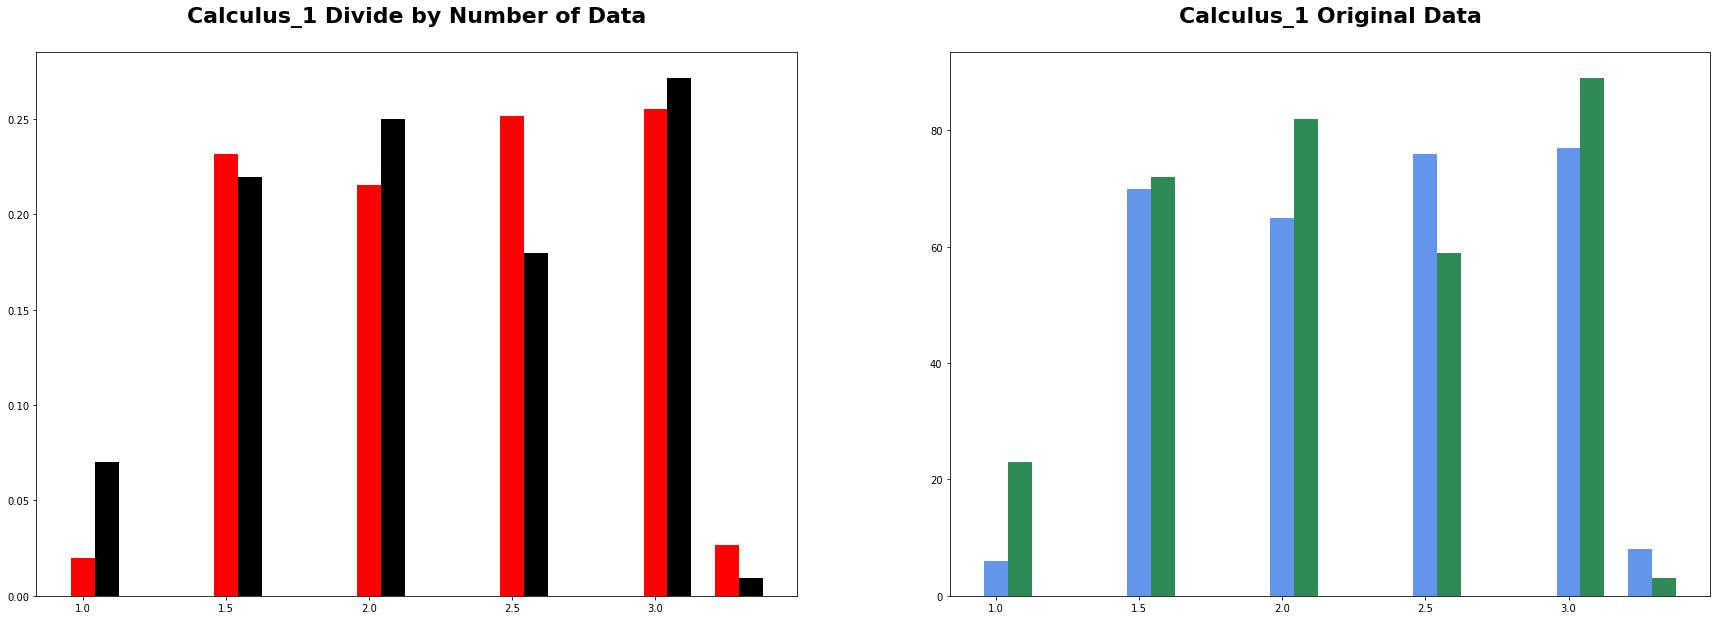

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

cleand_data_csv = 'https://raw.githubusercontent.com/charmy2525/DataAnalytics/main/Data%20analytics%20course%20data%20set%20-%20student%20academic%20performance%20-%20output%20after%20data%20cleaning.csv'
data_file ='https://raw.githubusercontent.com/charmy2525/DataAnalytics/main/Data%20analytics%20course%20data%20set%20-%20student%20academic%20performance%20-%20data.csv'
df = pd.read_csv(cleand_data_csv)
#df = pd.read_csv(data_file)

#import seaborn
#seaborn.set(style='ticks')
feature = 'Calculus_1' #กำหนด feature ที่สนใจ หากจะเปลี่ยน feature ให้เปลี่ยนชื่อที่ตรงนี้

#สนใจดึงข้อมูล 2 ปี คือ 2020 2019 มาเปรียบเทียบกัน
rvs1 = df[(df['Year_of_Entry'] == 2020)] #กรองข้อมูลเฉพาะในปี 2020
rvs2 = df[(df['Year_of_Entry'] == 2019)] #กรองข้อมูลเฉพาะในปี 2019
data1 = rvs1[feature].astype(float) #ดึงข้อมูลเฉพาะ feature ที่ต้องการ และกำหนดให้ข้อมูลเป็นประเภท float (ตัวเลขที่มีจุดทศนิยม)
data2 = rvs2[feature].astype(float) #ดึงข้อมูลเฉพาะ feature ที่ต้องการ และกำหนดให้ข้อมูลเป็นประเภท float (ตัวเลขที่มีจุดทศนิยม)
data1.index = pd.RangeIndex(start=0, stop=0+len(data1), step=1) #เรียบเรียง index ของข้อมูลที่ดึงมาเพื่อประโยชน์ในการทำกราฟต่อไป
data2.index = pd.RangeIndex(start=0, stop=0+len(data2), step=1) #เรียบเรียง index ของข้อมูลที่ดึงมาเพื่อประโยชน์ในการทำกราฟต่อไป

fig = plt.figure(figsize = (30,10)) #กำหนดขนาดกรอบรวมของข้อมูล
ax = fig.add_subplot(121) #เพิ่มกราฟย่อยที่ตำแหน่งแถวที่ 1 มี 2 column ตำแหน่งระบุที่ column ที่ 1
bx = fig.add_subplot(122) #เพิ่มกราฟย่อยที่ตำแหน่งแถวที่ 1 มี 2 column ตำแหน่งระบุที่ column ที่ 2

#กำหนดชื่อหัวตารางของ กราฟย่อยทั้ง 2
ax.set_title(feature+' Divide by Number of Data',fontweight="bold", fontsize=22,pad=30)
bx.set_title(feature+' Original Data',fontweight="bold", fontsize=22,pad=30)

a_heights, a_bins = np.histogram(data1) #คำสั่ง histogram เป็นการจัดทำข้อมูล เป็น histogram ทั้งกำหนดแกน X และนับเพื่อหาจำนวนรวมสำหรับแกน y
b_heights, b_bins = np.histogram(data2, bins=a_bins)

width = (a_bins[1] - a_bins[0])/3 #กำหนดความกว้างของกราฟแท่งใน histogram

ax.bar(a_bins[:-1], a_heights/len(data1), width=width, facecolor='red') #plot กราฟแท่งโดยใช้ข้อมูลจาก histogram
ax.bar(b_bins[:-1]+width, b_heights/len(data2), width=width, facecolor='black') #plot กราฟแท่งโดยใช้ข้อมูลจาก histogram

bx.bar(a_bins[:-1], a_heights, width=width, facecolor='cornflowerblue') #plot กราฟแท่งโดยใช้ข้อมูลจาก histogram
bx.bar(b_bins[:-1]+width, b_heights, width=width, facecolor='seagreen') #plot กราฟแท่งโดยใช้ข้อมูลจาก histogram

### Bar chart for category data (no ranking)

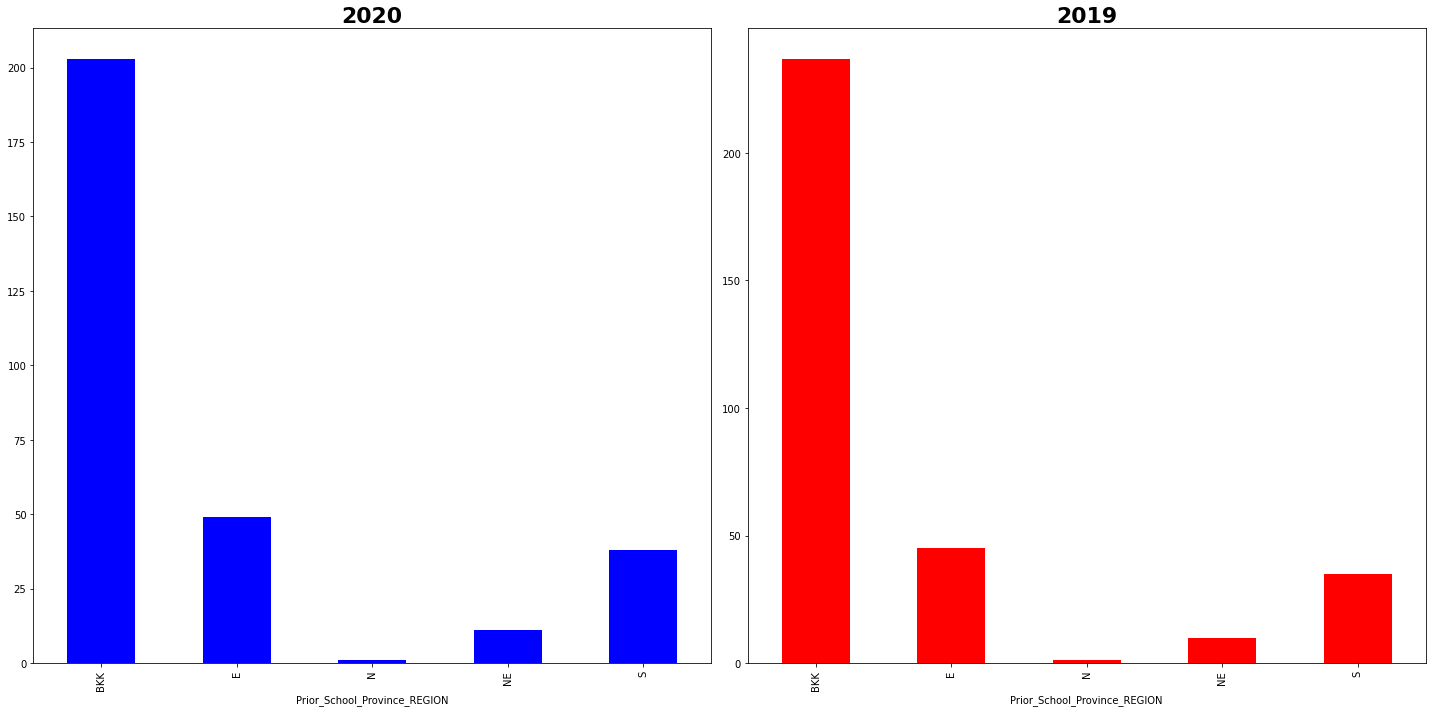

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

cleand_data_csv = 'https://raw.githubusercontent.com/charmy2525/DataAnalytics/main/Data%20analytics%20course%20data%20set%20-%20student%20academic%20performance%20-%20output%20after%20data%20cleaning.csv'
data_file ='https://raw.githubusercontent.com/charmy2525/DataAnalytics/main/Data%20analytics%20course%20data%20set%20-%20student%20academic%20performance%20-%20data.csv'
df = pd.read_csv(cleand_data_csv)
#df = pd.read_csv(data_file)

#import seaborn
#seaborn.set(style='ticks')
feature = 'Prior_School_Province_REGION'

data1 = df[(df['Year_of_Entry'] == 2020)].copy()
data2 = df[(df['Year_of_Entry'] == 2019)].copy()

fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

data1.groupby(feature).size().plot(kind='bar', ax=ax1, color ='blue') #คำสั่ง groupby.size() เป็นการนับข้อมูลที่ตรงตาม feature ที่กำหนด
data2.groupby(feature).size().plot(kind='bar', ax=ax2, color ='red')

ax1.set_title('2020',fontweight="bold", size=22)
ax2.set_title('2019',fontweight="bold", size=22)

ax1.set_ylabel('')
ax2.set_ylabel('')

plt.tight_layout()

plt.show()

## Comparing two population (Multi distribution)

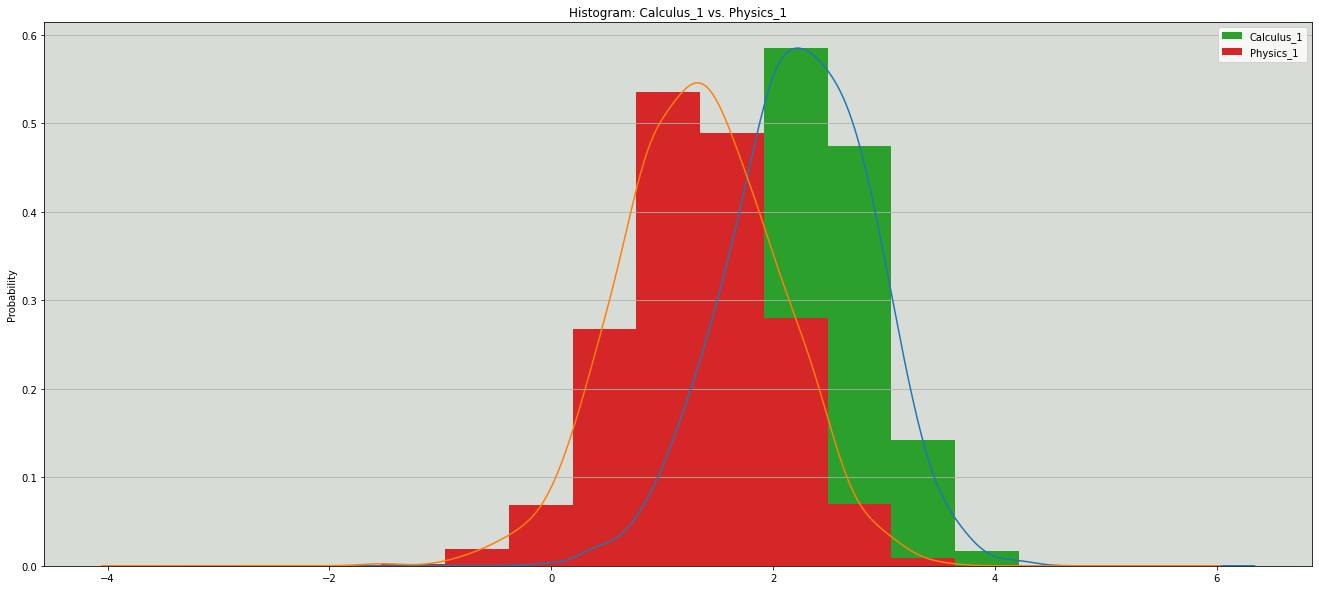

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

cleand_data_csv = 'https://raw.githubusercontent.com/charmy2525/DataAnalytics/main/Data%20analytics%20course%20data%20set%20-%20student%20academic%20performance%20-%20output%20after%20data%20cleaning.csv'
data_file ='https://raw.githubusercontent.com/charmy2525/DataAnalytics/main/Data%20analytics%20course%20data%20set%20-%20student%20academic%20performance%20-%20data.csv'
df = pd.read_csv(cleand_data_csv)
#df = pd.read_csv(data_file)

#means = df.Calculus_1.mean(), df.Physics_1.mean()
feature = 'Calculus_1'
feature2 = 'Physics_1'
means = df[feature].mean(),df[feature2].mean()
stdevs = df[feature].std(), df[feature2].std()

dist = pd.DataFrame(np.random.normal(loc=means, scale=stdevs, size=(df.shape[0], 2)), columns=[feature,feature2])
dist.agg(['min', 'max', 'mean', 'std']).round(decimals=4)

fig = plt.figure(figsize = (50,10))
ax = fig.add_subplot(121)
dist.plot.kde(ax=ax, legend=False, title='Histogram: '+feature+' vs. '+feature2)
dist.plot.hist(density=True, ax=ax)
ax.set_ylabel('Probability')
ax.grid(axis='y')
ax.set_facecolor('#d8dcd6')
#ax.set_xlim(-3,3)

## PIE Chart

### Numerical Data

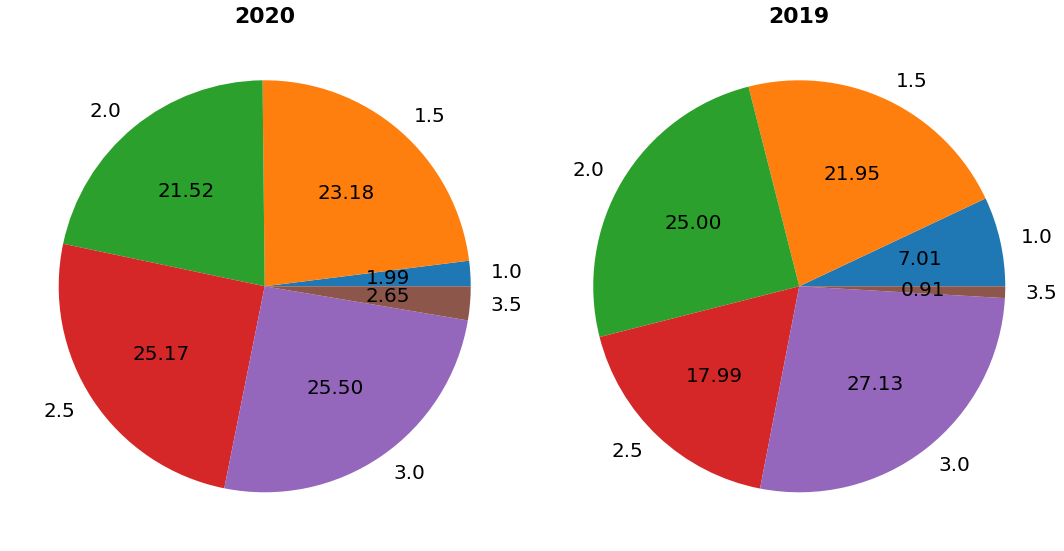

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

cleand_data_csv = 'https://raw.githubusercontent.com/charmy2525/DataAnalytics/main/Data%20analytics%20course%20data%20set%20-%20student%20academic%20performance%20-%20output%20after%20data%20cleaning.csv'
data_file ='https://raw.githubusercontent.com/charmy2525/DataAnalytics/main/Data%20analytics%20course%20data%20set%20-%20student%20academic%20performance%20-%20data.csv'
df = pd.read_csv(cleand_data_csv)
#df = pd.read_csv(data_file)

#import seaborn
#seaborn.set(style='ticks')
feature = 'Calculus_1'

data1 = df[(df.Year_of_Entry == 2020)].copy()
data2 = df[(df.Year_of_Entry == 2019)].copy()

fig = plt.figure(figsize = (15,15))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

data1.groupby(feature).size().plot(kind='pie', autopct='%.2f', textprops={'fontsize': 20}, ax=ax1)
data2.groupby(feature).size().plot(kind='pie', autopct='%.2f', textprops={'fontsize': 20}, ax=ax2)

ax1.set_title('2020',fontweight="bold", size=22)
ax2.set_title('2019',fontweight="bold", size=22)

ax1.set_ylabel('')
ax2.set_ylabel('')

plt.tight_layout()

plt.show()

### Category Data

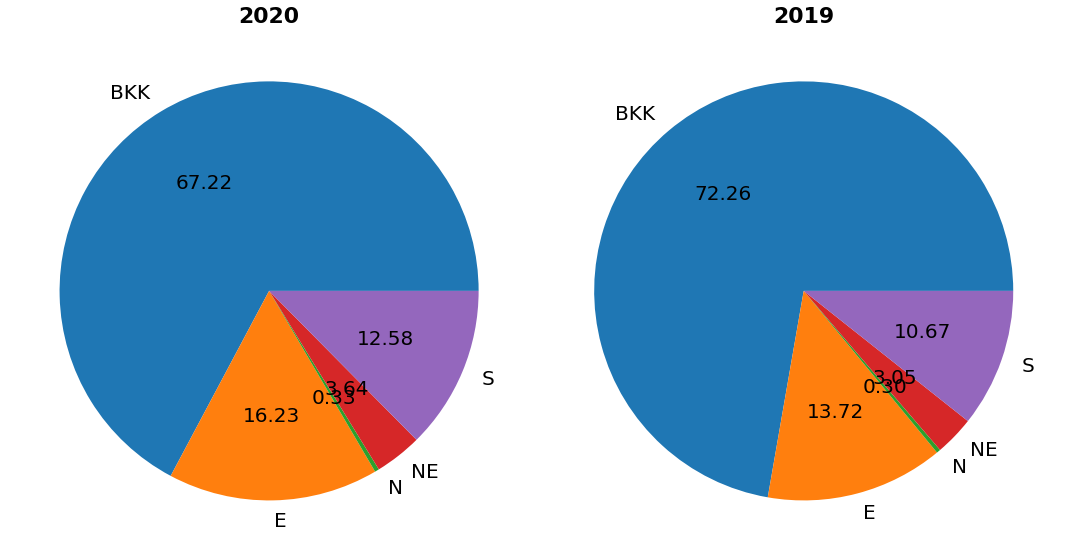

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

cleand_data_csv = 'https://raw.githubusercontent.com/charmy2525/DataAnalytics/main/Data%20analytics%20course%20data%20set%20-%20student%20academic%20performance%20-%20output%20after%20data%20cleaning.csv'
data_file ='https://raw.githubusercontent.com/charmy2525/DataAnalytics/main/Data%20analytics%20course%20data%20set%20-%20student%20academic%20performance%20-%20data.csv'
df = pd.read_csv(cleand_data_csv)
#df = pd.read_csv(data_file)

#import seaborn
#seaborn.set(style='ticks')
feature = 'Prior_School_Province_REGION'

data1 = df[(df.Year_of_Entry == 2020)].copy()
data2 = df[(df.Year_of_Entry == 2019)].copy()

fig = plt.figure(figsize = (15,15))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

data1.groupby(feature).size().plot(kind='pie', autopct='%.2f', textprops={'fontsize': 20}, ax=ax1)
data2.groupby(feature).size().plot(kind='pie', autopct='%.2f', textprops={'fontsize': 20}, ax=ax2)

ax1.set_title('2020',fontweight="bold", size=22)
ax2.set_title('2019',fontweight="bold", size=22)

ax1.set_ylabel('')
ax2.set_ylabel('')

plt.tight_layout()

plt.show()

## Box Plots

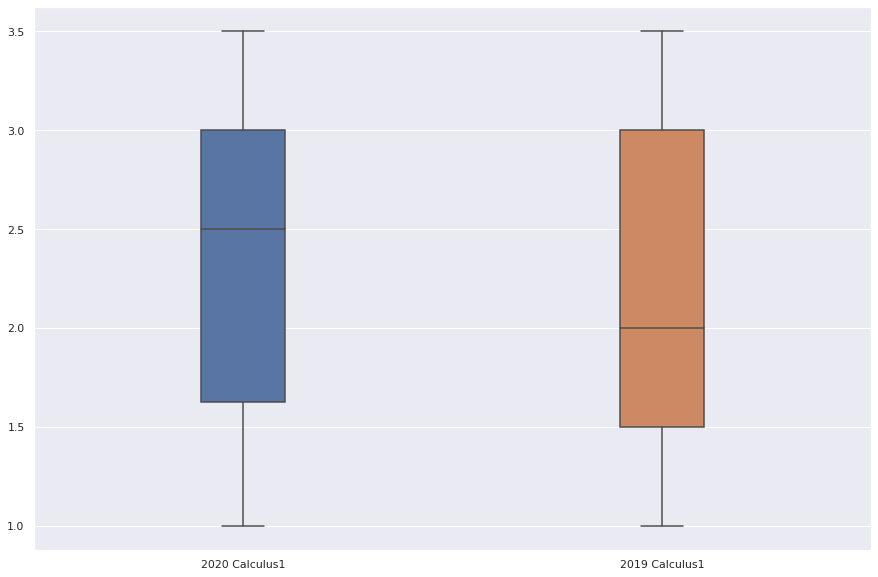

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

cleand_data_csv = 'https://raw.githubusercontent.com/charmy2525/DataAnalytics/main/Data%20analytics%20course%20data%20set%20-%20student%20academic%20performance%20-%20output%20after%20data%20cleaning.csv'
data_file ='https://raw.githubusercontent.com/charmy2525/DataAnalytics/main/Data%20analytics%20course%20data%20set%20-%20student%20academic%20performance%20-%20data.csv'
df = pd.read_csv(cleand_data_csv)
#df = pd.read_csv(data_file)

feature = 'Calculus_1'
rvs1 = df[(df.Year_of_Entry == 2020)]
rvs2 = df[(df.Year_of_Entry == 2019)]
data1 = rvs1[feature].astype(float)
data2 = rvs2[feature].astype(float)

data1.index = pd.RangeIndex(start=0, stop=0+len(data1), step=1)
data2.index = pd.RangeIndex(start=0, stop=0+len(data2), step=1)

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks")
%matplotlib inline

newdata = pd.Series(data1, name="2020 Calculus1").to_frame().join(pd.Series(data2, name="2019 Calculus1"))
sns.set(rc={'figure.figsize':(15,10)})
sns.boxplot(data=newdata, width = 0.2) 


## Violin Plot

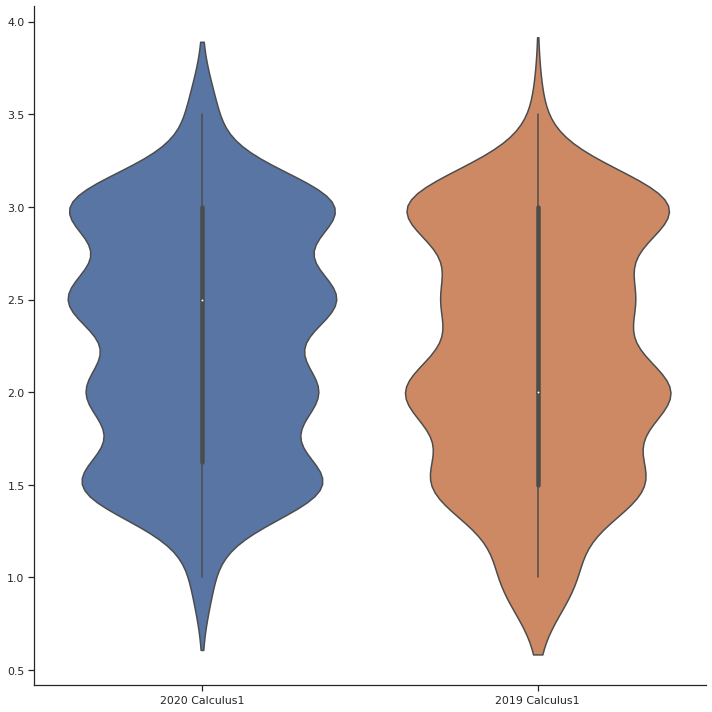

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

cleand_data_csv = 'https://raw.githubusercontent.com/charmy2525/DataAnalytics/main/Data%20analytics%20course%20data%20set%20-%20student%20academic%20performance%20-%20output%20after%20data%20cleaning.csv'
data_file ='https://raw.githubusercontent.com/charmy2525/DataAnalytics/main/Data%20analytics%20course%20data%20set%20-%20student%20academic%20performance%20-%20data.csv'
df = pd.read_csv(cleand_data_csv)
#df = pd.read_csv(data_file)

feature = 'Calculus_1'
rvs1 = df[(df['Year_of_Entry'] == 2020)]
rvs2 = df[(df['Year_of_Entry'] == 2019)]
data1 = rvs1[feature].astype(float)
data2 = rvs2[feature].astype(float)

data1.index = pd.RangeIndex(start=0, stop=0+len(data1), step=1)
data2.index = pd.RangeIndex(start=0, stop=0+len(data2), step=1)

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks")
%matplotlib inline

newdata = pd.Series(data1, name="2020 Calculus1").to_frame().join(pd.Series(data2, name="2019 Calculus1"))

sns.catplot(data=newdata, width = 0.8, height=10, kind="violin")

## Pareto Chart

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10] [0.25264585 0.42121147 0.55600112 0.65280626 0.73303347 0.80524044
 0.86817866 0.92292301 0.96863011 1.        ]


(0.0, 100.0)

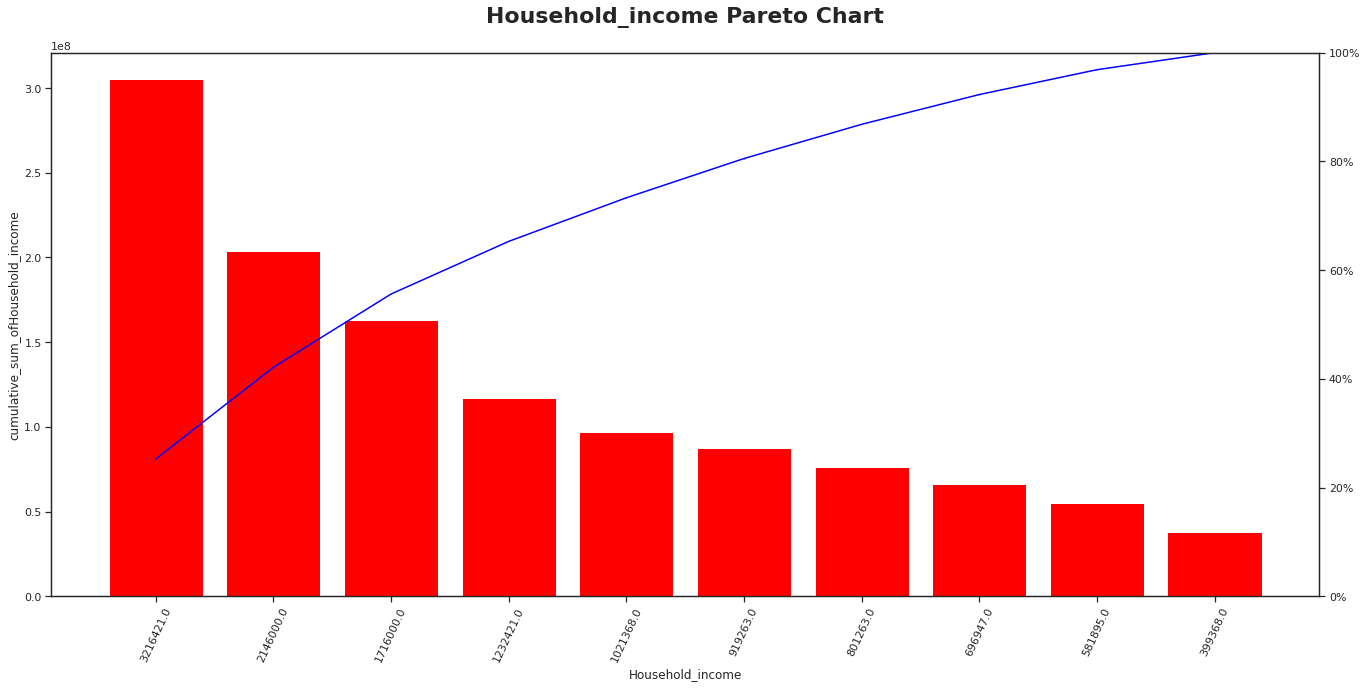

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

cleand_data_csv = 'https://raw.githubusercontent.com/charmy2525/DataAnalytics/main/Data%20analytics%20course%20data%20set%20-%20student%20academic%20performance%20-%20output%20after%20data%20cleaning.csv'
data_file ='https://raw.githubusercontent.com/charmy2525/DataAnalytics/main/Data%20analytics%20course%20data%20set%20-%20student%20academic%20performance%20-%20data.csv'
df = pd.read_csv(cleand_data_csv)
#df = pd.read_csv(data_file)

from matplotlib.ticker import PercentFormatter
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

feature='Household_income'#'Time_spent_for_traveling'#

df2 = df.sort_values(by=feature,ascending=False).reset_index(drop=True)

bins = 10
interval = math.ceil(len(df2[feature])/bins)

x_axis=[0]
x_axis_value =[]
y_value=[]
for x in range(bins):
    y_value.append(df2[feature].iloc[x*interval:(x+1)*interval].sum())
    x_axis_value.append(x+1)
    x_axis.append(round(df2[feature].iloc[x*interval:(x+1)*interval].sum()/interval,0))

fig = plt.figure(figsize = (50,10))
ax = fig.add_subplot(121)

idx = np.asarray([i for i in range(len(x_axis))])
ax.set_xticks(idx)
ax.set_xticklabels(x_axis, rotation=65)
ax.set_xlabel(feature)
ax.set_ylabel('cumulative_sum_of'+feature)
ax.set_title(feature+' Pareto Chart',fontweight="bold", fontsize=22,pad=30)
ax.bar(x_axis_value, y_value, facecolor='red')



def cumSum(s):
   sm=0
   cum_list=[]
   for i in s:
      sm=sm+i
      cum_list.append(sm)
   return cum_list

y_cumsum =  cumSum(y_value)
y_cumsum = y_cumsum/max(y_cumsum)
print(x_axis_value,y_cumsum )
ax2 = ax.twinx()
ax2.plot(x_axis_value, y_cumsum*100, color="blue", marker="D", ms=0.1)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.set_ylim(0,100)